<a href="https://colab.research.google.com/github/liyachittilappilly/RegressionAnalysisCanadaIncome/blob/main/CanadaIncome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [ ]:
print(df.shape)
df.describe()

(47, 2)


,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [ ]:
df.isna().sum()

,0
year,0
per capita income (US$),0


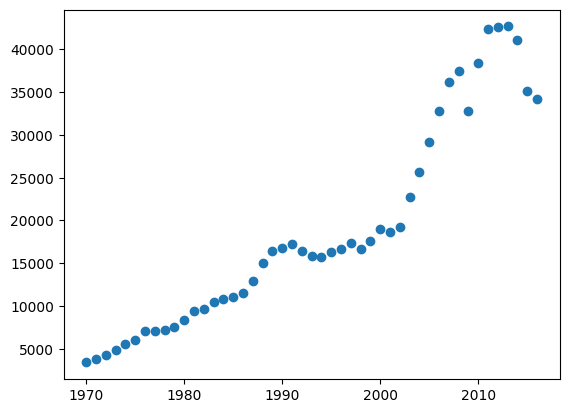

In [ ]:
X=df.drop('per capita income (US$)',axis=1)
y=df['per capita income (US$)']
plt.scatter(X,y)
plt.show()

In [ ]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

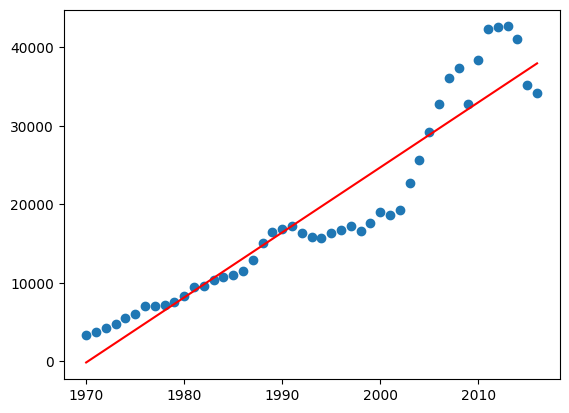

In [ ]:
plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red')
plt.show()

In [ ]:
r2_score=model.score(X,y)
print(r2_score*100)

89.0916917957032


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)

In [ ]:
m=LinearRegression()
m.fit(X_poly,y)

LinearRegression()

In [ ]:
r2_score=m.score(X_poly,y)
print(r2_score*100)

92.90565008926308


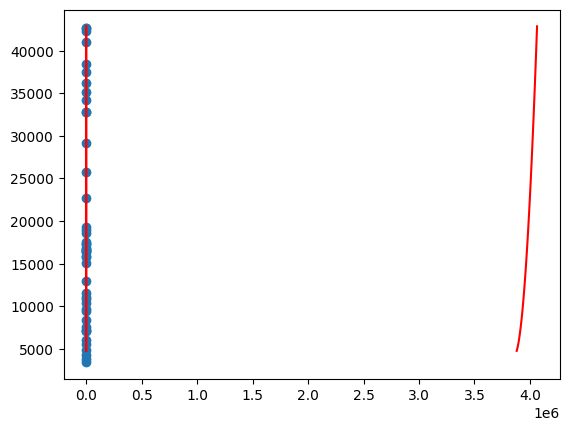

In [ ]:
plt.scatter(X,y)
plt.plot(X_poly,m.predict(X_poly),color='red')
plt.show()

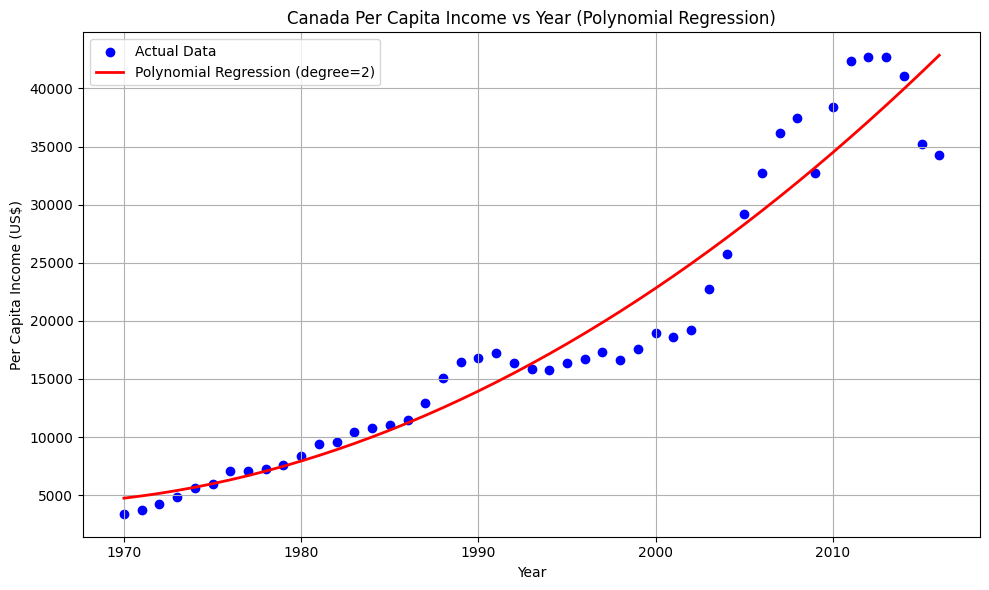

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = df['year'].values.reshape(-1, 1)
y = df['per capita income (US$)'].values.reshape(-1, 1)

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Model training
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Sort for smooth plot
sorted_indices = X.flatten().argsort()
X_sorted = X[sorted_indices]
X_poly_sorted = poly.transform(X_sorted)
y_sorted_pred = model.predict(X_poly_sorted)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_sorted, y_sorted_pred, color='red', linewidth=2, label='Polynomial Regression (degree=2)')
plt.xlabel("Year")
plt.ylabel("Per Capita Income (US$)")
plt.title("Canada Per Capita Income vs Year (Polynomial Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
